# Task 1
      Write Deployment code For Fruit_360 ( Neural Network )



In [1]:
## import libraries
import pandas as pd
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 172ms/step


The fruit is pear_3


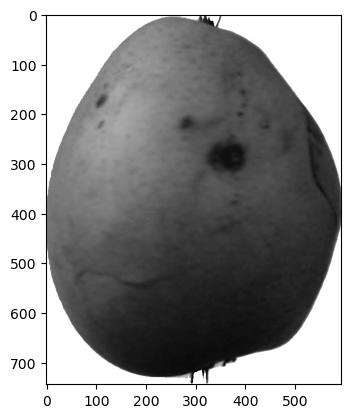

In [2]:
## import model and encoder 
model1   =  joblib.load("../TrainedModels/DL_ANN_ClassifierModel.pkl")
encoder1 = joblib.load("../TrainedModels/DL_ANN_Classifier_LabelEncoder.pkl")

##  Make function for preprocessing and predicting
labels = {i:label for i,label in enumerate(encoder1.classes_)}

def preprocessing(path):
    input_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    global  imgsh
    imgsh  = input_img
    resized_input_image = cv2.resize(input_img, (250, 250))
    flattened_input_image = resized_input_image.flatten().tolist()
    ##Scale the image before converting it into dataFrame
    return pd.DataFrame(np.array([flattened_input_image]) / 255)


def prediction(path):
    y_preprocessed = preprocessing(path)
    y = model1.predict(y_preprocessed)
    y_max = np.argmax(y)
    return y_max


y_p = prediction("../OpenCvDataSet/fruits-360-original-size/fruits-360-original-size/Test/pear_3/r0_115.jpg")
print("\n\nThe fruit is",labels[y_p])
plt.imshow(cv2.cvtColor(imgsh,cv2.COLOR_BGR2RGB) )

# Task 2
        Create a diverse dataset of your friends, ensuring it includes a minimum of 20 pictures of each friend. Then, embark on an exciting journey of applying state-of-the-art Deep Learning techniques to solve the classification problem. The objective is to develop a robust and accurate model that can identify different friends in the pictures.

    Once you've successfully trained the Deep Learning model, take the final step of deploying it. This will enable you to share the model with others, allowing them to experience the fun of classifying their own friends in pictures.

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix ,accuracy_score


In [4]:
folders_name = os.listdir("../DeepLearningDataSet/Friends_Pic")
folders_name

['auun', 'goraya', 'touseef', 'usama']

In [5]:
pathname = r"../DeepLearningDataSet/Friends_Pic"
folder_path = [f"{pathname}\\{folder}" for folder in folders_name]
folder_path

['../DeepLearningDataSet/Friends_Pic\\auun',
 '../DeepLearningDataSet/Friends_Pic\\goraya',
 '../DeepLearningDataSet/Friends_Pic\\touseef',
 '../DeepLearningDataSet/Friends_Pic\\usama']

In [6]:
dataset = []  # Create an empty list to store the data

for i in folder_path:
    folder = os.path.basename(i)
    for path in os.listdir(i):
        full_path = os.path.join(i, path)

        if os.path.isfile(full_path):
            img_read = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)

            if img_read is not None:
                resize_img = cv2.resize(img_read, (120, 160))
                flatten_img = resize_img.flatten().tolist()
                
                dataset.append(flatten_img + [folder])    

In [7]:
df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19191,19192,19193,19194,19195,19196,19197,19198,19199,19200
0,207,207,208,208,209,210,210,211,211,211,...,12,11,10,10,10,10,10,10,10,auun
1,213,213,214,214,214,215,215,215,215,216,...,13,12,11,10,10,10,10,10,10,auun
2,214,214,214,214,214,214,215,215,215,216,...,9,10,10,10,10,10,9,9,9,auun
3,219,220,219,217,215,215,214,216,216,216,...,140,16,12,11,11,10,8,7,7,auun
4,219,220,219,217,215,215,214,216,216,216,...,140,16,12,11,11,10,8,7,7,auun


In [8]:
df.rename(columns={df.iloc[:,-1].name : "Label"} ,inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19191,19192,19193,19194,19195,19196,19197,19198,19199,Label
0,207,207,208,208,209,210,210,211,211,211,...,12,11,10,10,10,10,10,10,10,auun
1,213,213,214,214,214,215,215,215,215,216,...,13,12,11,10,10,10,10,10,10,auun
2,214,214,214,214,214,214,215,215,215,216,...,9,10,10,10,10,10,9,9,9,auun
3,219,220,219,217,215,215,214,216,216,216,...,140,16,12,11,11,10,8,7,7,auun
4,219,220,219,217,215,215,214,216,216,216,...,140,16,12,11,11,10,8,7,7,auun


In [9]:
## Count the label value in row
y = df.iloc[: , -1]
y.value_counts()

usama      46
auun       32
touseef    30
goraya     21
Name: Label, dtype: int64

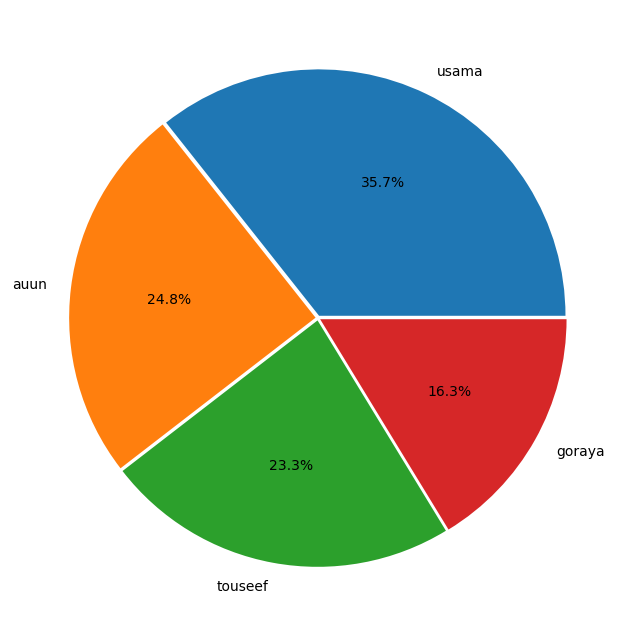

In [10]:
## Show the pie chart of label data 
plt.figure(figsize=(8,8))
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%1.1f%%',explode = [0.01 for i in range(len(y.value_counts()))]);


Text(0, 0.5, 'Images')

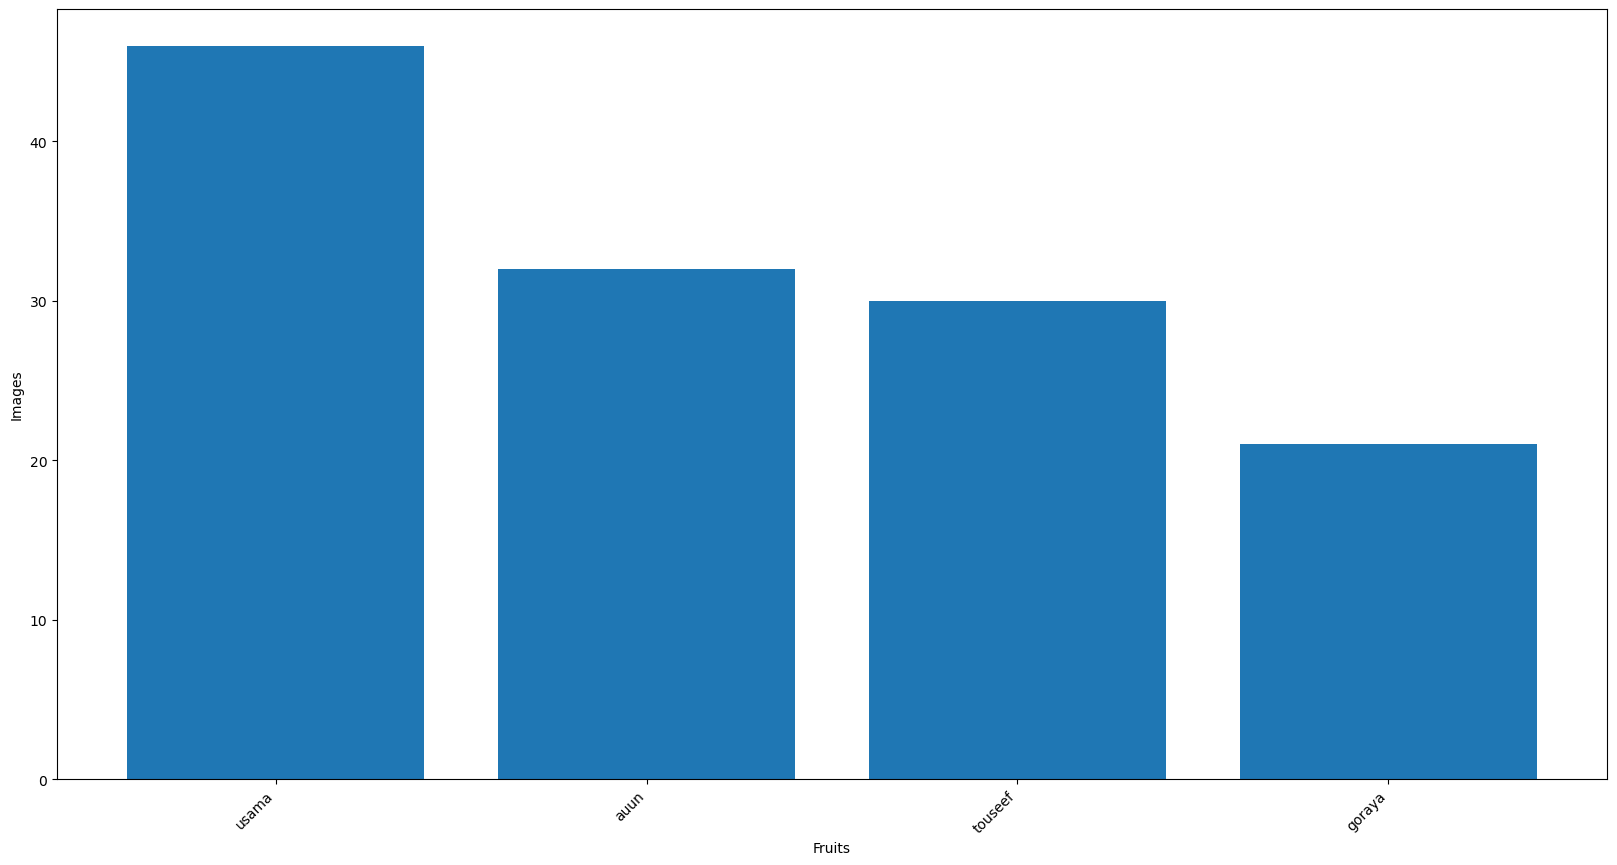

In [11]:
## show the bar graph of Label Data
plt.figure(figsize=(20,10))
plt.bar(y.value_counts().index, y.value_counts().values ,)
plt.xticks(rotation=45, ha='right');
plt.xlabel("Fruits")
plt.ylabel("Images")

In [12]:
## Split the data into x and y

x_data = df.drop("Label" , axis =1)
y = df.iloc[:,-1]

## scale x data
x = x_data/255

In [13]:
## label Encode the y_label
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [14]:
## split the Data into Train test

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y_encoded ,test_size = 0.2 ,random_state = 42)


## Deep Learning model

In [15]:
 ## import necessary libraries/frameworks
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [16]:
## Create layers
model = Sequential()

## first layers
model.add(Dense(units = 28 ,activation = "relu" ,input_shape = (120*160,)))

## 2nd layers
model.add(Dense(units = 14 ,activation = "relu" ))

## output layer
model.add(Dense(len(y.value_counts()), activation="softmax"))

model.compile(loss="binary_crossentropy" if len(y.value_counts()) < 3 else "categorical_crossentropy",optimizer='adam' ,metrics = ["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                537628    
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 dense_2 (Dense)             (None, 4)                 60        
                                                                 
Total params: 538094 (2.05 MB)
Trainable params: 538094 (2.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
## Encode y_labels using onehotencoder

from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test) 
model.fit(x_train ,y_train_encoded ,batch_size = 5 ,epochs = 10 ,validation_split = 0.2)

Epoch 1/10
17/17 [==============================] - 3s 60ms/step - loss: 1.4308 - accuracy: 0.4512 - val_loss: 0.5349 - val_accuracy: 0.7143
Epoch 2/10
17/17 [==============================] - 0s 24ms/step - loss: 0.3887 - accuracy: 0.7805 - val_loss: 0.2390 - val_accuracy: 0.9048
Epoch 3/10
17/17 [==============================] - 0s 30ms/step - loss: 0.2239 - accuracy: 0.9634 - val_loss: 0.1662 - val_accuracy: 1.0000
Epoch 4/10
17/17 [==============================] - 0s 29ms/step - loss: 0.1312 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 1.0000
Epoch 5/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0878 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0634 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 0s 23ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 1.0000
Epoch 8/10
17

In [18]:
## Predict the value
y_predict_encoded = model.predict(x_test)
y_pred = np.argmax(y_predict_encoded,axis = 1)
y_pred

1/1 [==============================] - 0s 85ms/step


array([2, 1, 0, 0, 3, 2, 2, 3, 2, 0, 3, 0, 2, 0, 3, 3, 1, 2, 3, 3, 0, 2,
       3, 0, 3, 1], dtype=int64)

In [19]:
## Evaluation Metrics
print("Confusion Matric\n",confusion_matrix(y_test , y_pred))

print("\n\nAccuracy_score:" , accuracy_score(y_test ,y_pred))

Confusion Matric
 [[7 0 1 0]
 [0 3 0 0]
 [0 0 6 0]
 [0 0 0 9]]


Accuracy_score: 0.9615384615384616


1/1 [==============================] - 0s 30ms/step


The picture is usama


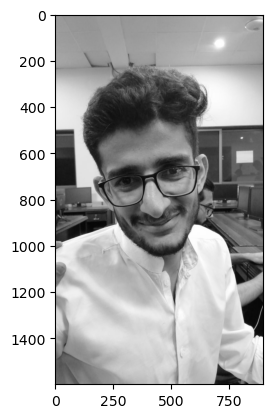

In [20]:
##  Make function for preprocessing and predicting
labels = {i:label for i,label in enumerate(encoder.classes_)}

def preprocessing(path):
    input_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    global  imgsh
    imgsh  = input_img
    resized_input_image = cv2.resize(input_img, (120, 160))
    flattened_input_image = resized_input_image.flatten().tolist()
    ##Scale the image before converting it into dataFrame
    return pd.DataFrame(np.array([flattened_input_image]) / 255)


def prediction(path):
    y_preprocessed = preprocessing(path)
    y = model.predict(y_preprocessed)
    y_max = np.argmax(y)
    return y_max

## This picture is of osama
y_p = prediction("../DeepLearningDataSet/Friend_test_pics/usama/WhatsApp Image 2023-07-26 at 8.14.02 PM.jpeg")
print("\n\nThe picture is",labels[y_p])
plt.imshow(cv2.cvtColor(imgsh,cv2.COLOR_BGR2RGB) );